In [1]:
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [18]:
mpg=pd.read_csv("auto-mpg.csv")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
mpg.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [4]:
mpg.shape

(398, 9)

In [5]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
mpg.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [7]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

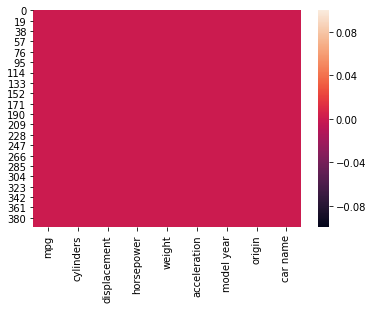

In [8]:
sns.heatmap(mpg.isnull())

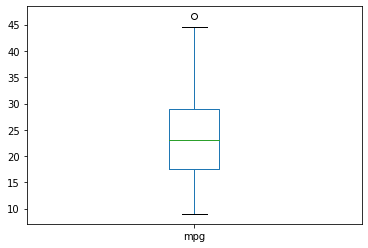

In [9]:
mpg['mpg'].plot.box()

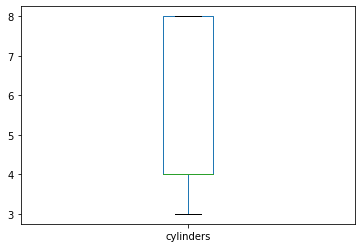

In [10]:
mpg['cylinders'].plot.box()

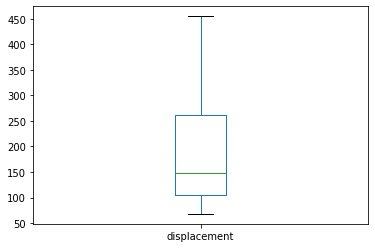

In [11]:
mpg['displacement'].plot.box()

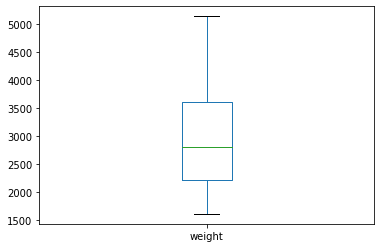

In [12]:
mpg['weight'].plot.box()

mpg                AxesSubplot(0.125,0.536818;0.0945122x0.343182)
cylinders       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
displacement    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
weight          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
acceleration    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
model year      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
origin          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
dtype: object

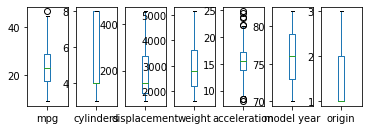

In [13]:
mpg.plot(kind='box',subplots=True,layout=(2,7))

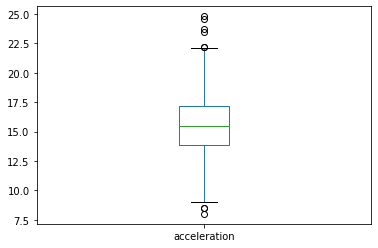

In [14]:
mpg['acceleration'].plot.box()

In [15]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [19]:
mpg.car_name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [20]:
mpg1=mpg.drop("horsepower",axis=1)
mpg1.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,3449,10.5,70,1,ford torino


In [21]:
mpg2=mpg1.drop("car_name",axis=1)
mpg2.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


In [22]:
from scipy.stats import zscore
z=np.abs(zscore(mpg2))

In [23]:
z

array([[0.7064387 , 1.49819126, 1.0906037 , ..., 1.29549834, 1.62742629,
        0.71514478],
       [1.09075062, 1.49819126, 1.5035143 , ..., 1.47703779, 1.62742629,
        0.71514478],
       [0.7064387 , 1.49819126, 1.19623199, ..., 1.65857724, 1.62742629,
        0.71514478],
       ...,
       [1.08701694, 0.85632057, 0.56103873, ..., 1.4407299 , 1.62198339,
        0.71514478],
       [0.57460104, 0.85632057, 0.70507731, ..., 1.10082237, 1.62198339,
        0.71514478],
       [0.95891297, 0.85632057, 0.71467988, ..., 1.39128549, 1.62198339,
        0.71514478]])

In [24]:
threshold=3
print(np.where(z>3))

(array([299, 394], dtype=int64), array([4, 4], dtype=int64))


In [25]:
mpg2=mpg2[(z<3).all(axis=1)]

In [26]:
mpg2.keys()

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

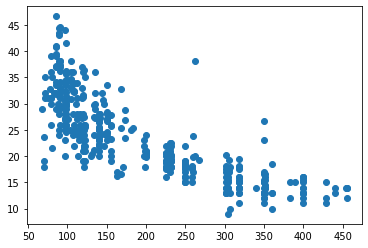

In [27]:
plt.scatter(mpg['displacement'],mpg['mpg'])
plt.show()

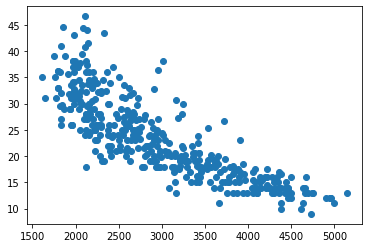

In [28]:
plt.scatter(mpg['weight'],mpg['mpg'])
plt.show()

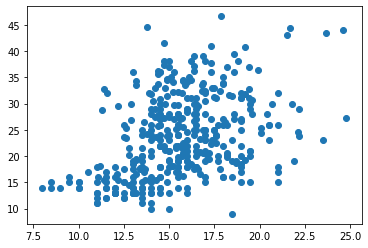

In [29]:
plt.scatter(mpg['acceleration'],mpg['mpg'])
plt.show()

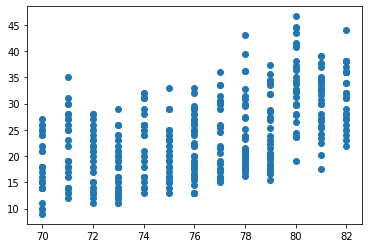

In [30]:
plt.scatter(mpg['model year'],mpg['mpg'])
plt.show()

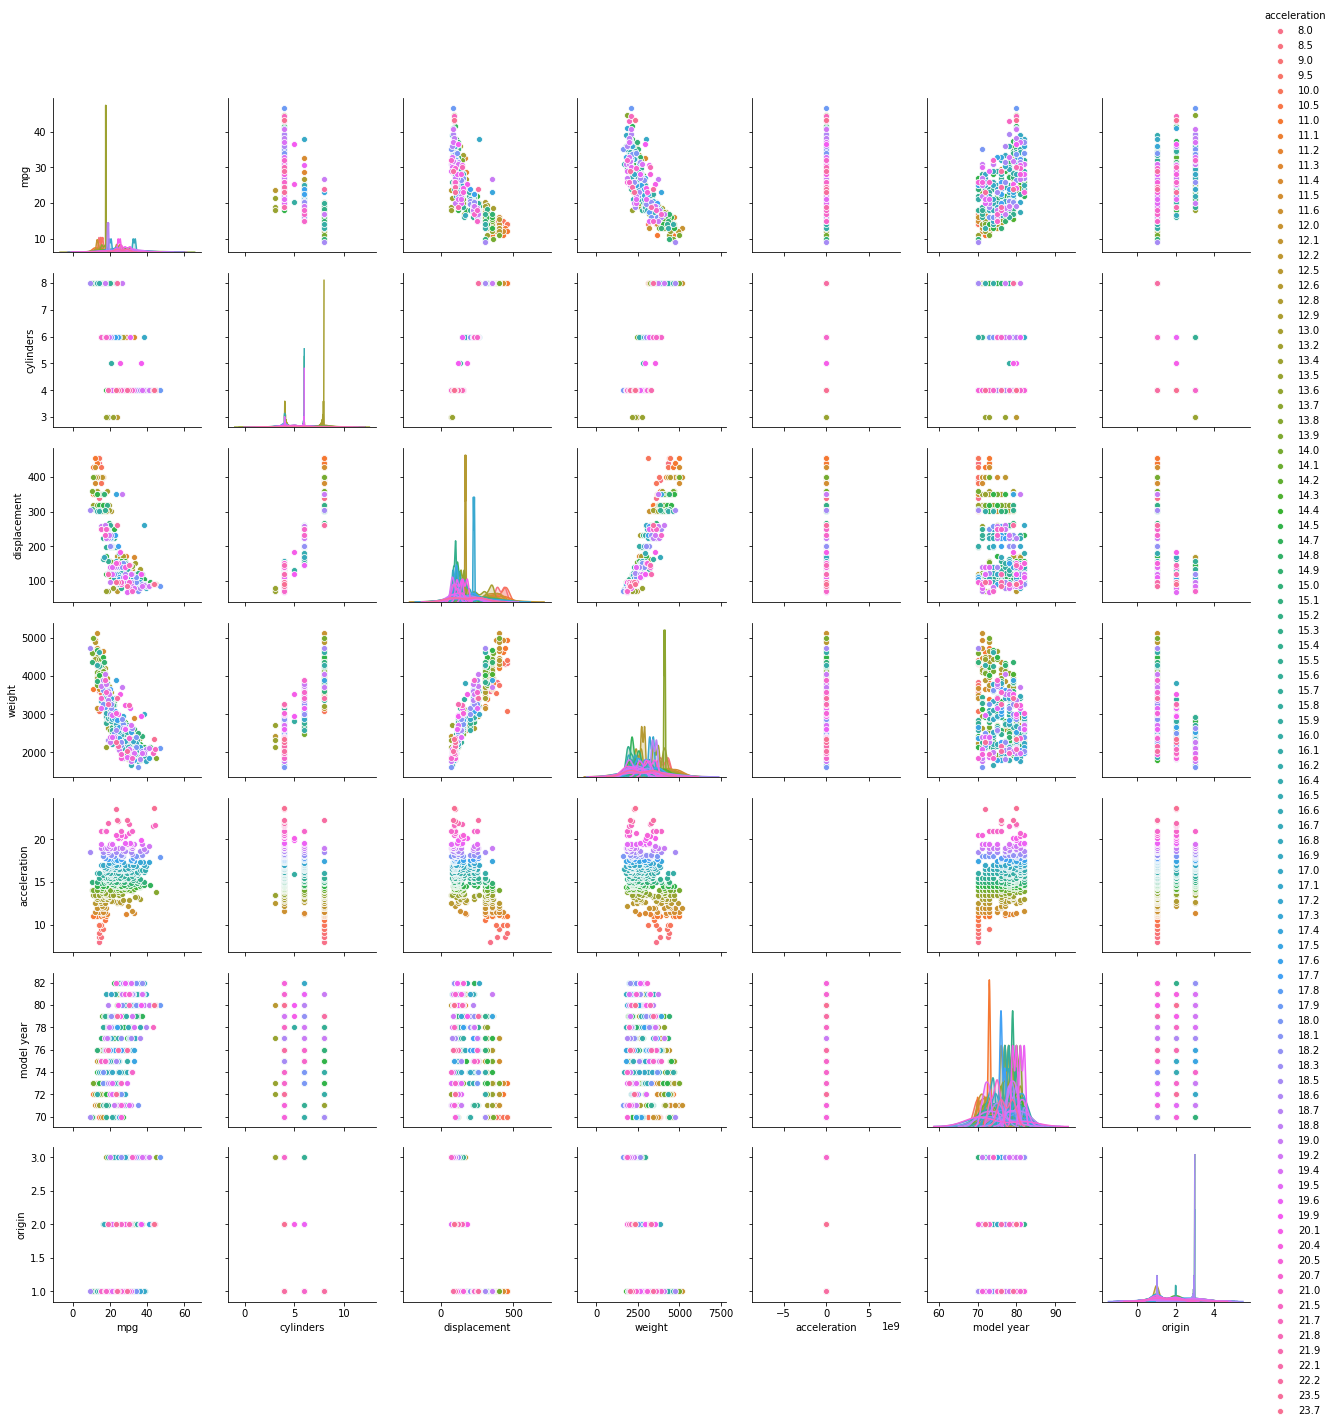

In [33]:
sns.pairplot(mpg2 ,hue='acceleration')

In [34]:
mpg.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


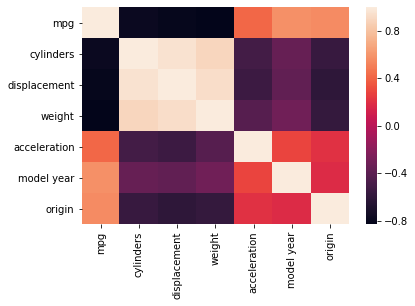

In [35]:
sns.heatmap(mpg.corr())

In [36]:
mpg2.shape

(396, 7)

In [37]:
mpg2.skew()

mpg             0.445176
cylinders       0.518701
displacement    0.712349
weight          0.528711
acceleration    0.154848
model year      0.017950
origin          0.930789
dtype: float64

In [38]:
lm=LinearRegression()

In [39]:
x=mpg2.drop('mpg',axis='columns')
x.head()

,cylinders,displacement,weight,acceleration,model year,origin
0,8,307.0,3504,12.0,70,1
1,8,350.0,3693,11.5,70,1
2,8,318.0,3436,11.0,70,1
3,8,304.0,3433,12.0,70,1
4,8,302.0,3449,10.5,70,1


In [40]:
y=mpg2.mpg
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
14     24.0
15     22.0
16     18.0
17     21.0
18     27.0
19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
24     21.0
25     10.0
26     10.0
27     11.0
28      9.0
29     27.0
       ... 
367    28.0
368    27.0
369    34.0
370    31.0
371    29.0
372    27.0
373    24.0
374    23.0
375    36.0
376    37.0
377    31.0
378    38.0
379    36.0
380    36.0
381    36.0
382    34.0
383    38.0
384    32.0
385    38.0
386    25.0
387    38.0
388    26.0
389    22.0
390    32.0
391    36.0
392    27.0
393    27.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 396, dtype: float64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=37)

In [50]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm.coef_

array([-0.290505  ,  0.01458019, -0.00682204,  0.12262798,  0.77039032,
        1.37253057])

In [52]:
lm.score(x_train,y_train)

0.8179671788525893

In [53]:
pred=lm.predict(x_test)
print('predicted result',pred)
print('actual price',y_test)

predicted result [25.08393112 19.78035117 31.12245654 23.61562142 33.47514023 33.97813005
 21.77439444 27.96176373 24.01236135 27.02838929 29.0061979  28.03625401
 27.32405183 23.30512217 24.61463206 23.50935082 33.36075581 15.3794185
 26.8060752  28.65152849 19.02404503 26.92019362 17.07972365 17.24665863
 18.23602277 15.4207326  35.8743621  33.50643933 13.25780869 30.96752766
 28.29686889 19.318474   30.60864027]
actual price 272    23.8
97     18.0
278    31.5
275    17.0
331    33.8
312    37.2
249    19.9
151    31.0
168    23.0
150    26.0
240    30.5
196    24.5
147    24.0
30     28.0
236    25.5
280    21.5
294    34.1
10     15.0
141    29.0
183    25.0
290    15.5
305    28.4
37     18.0
36     19.0
48     18.0
2      18.0
384    32.0
355    33.7
157    15.0
357    32.9
269    30.9
153    18.0
311    32.1
Name: mpg, dtype: float64


In [54]:
print('error')

print('mean absolute error',mean_absolute_error(y_test,pred))


print('mean squared error',mean_squared_error(y_test,pred))


print('root mean absolute error',np.sqrt(mean_squared_error(y_test,pred)))




error
mean absolute error 2.0337481604728893
mean squared error 6.161245664918662
root mean absolute error 2.4821856628622005


In [55]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8555159504242096


In [56]:
from sklearn.externals import joblib
joblib.dump(lm,"sbilifeinsurance")

['sbilifeinsurance']